# Federico de Jesús Montes de Oca Flores
## 1916227 - AI - Thu-N3

Importing Packages

In [1]:
try:
    import tensorflow as tf
    import numpy as np
    import matplotlib.pyplot as plt
except:
    !pip install tensorflow

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Exploring dataset

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels[0]

5

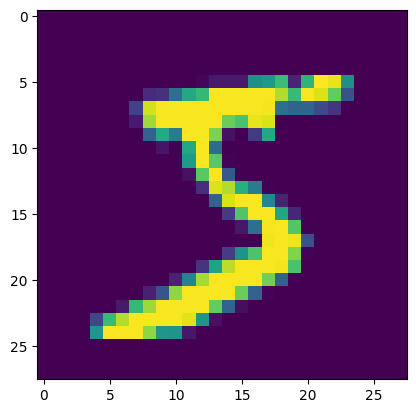

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255
test_images = test_images / 255

In [9]:
train = tf.data.Dataset.from_tensor_slices(train_images)
labels = tf.data.Dataset.from_tensor_slices(train_labels)
train = tf.data.Dataset.zip((train, labels))

In [10]:
def datasetConfiguration(dataset):
    dataset = dataset.cache()
    dataset = dataset.shuffle(buffer_size=len(dataset) + 1)
    dataset = dataset.batch(16)
    dataset = dataset.prefetch(8)
    return dataset

In [11]:
train = datasetConfiguration(train)

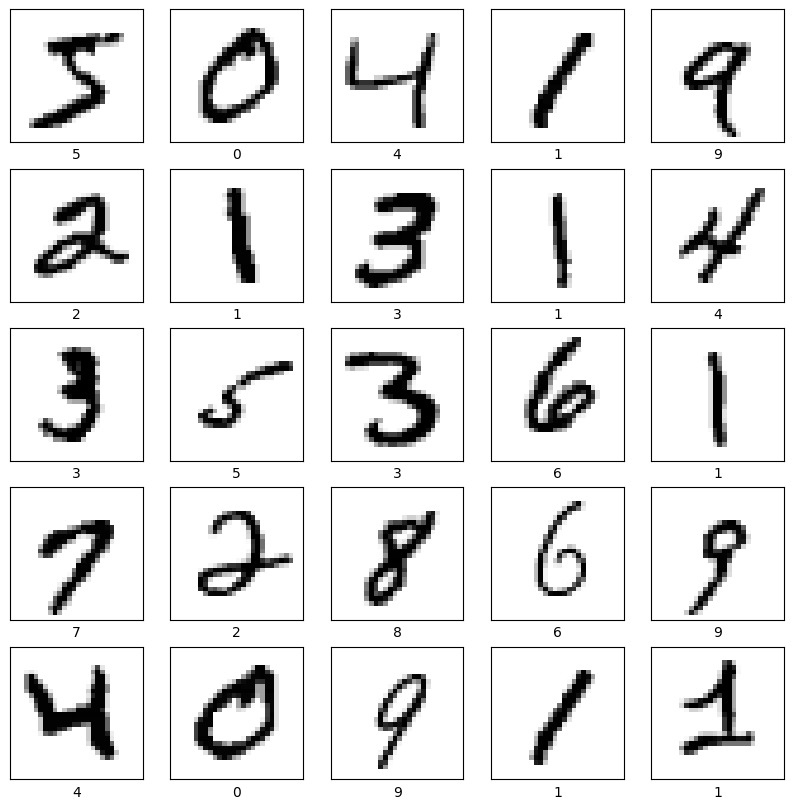

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(train, epochs=10)

Epoch 1/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.2284 - accuracy: 0.9346
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0988 - accuracy: 0.9700
Epoch 3/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0686 - accuracy: 0.9787
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0510 - accuracy: 0.9836
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0387 - accuracy: 0.9875
Epoch 6/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0313 - accuracy: 0.9900
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 9/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0186 - accuracy: 0.9934
Epoch 10/10
3750/3750 [==============================] - 12s 3ms/step - l

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0929 - accuracy: 0.9789 - 945ms/epoch - 3ms/step

Test accuracy: 0.9789000153541565


In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([4.9677229e-10, 1.6999577e-12, 1.2514493e-08, 2.4303250e-05,
       5.8063513e-17, 3.3350822e-10, 6.5442105e-18, 9.9997360e-01,
       2.3774939e-08, 2.0471389e-06], dtype=float32)

In [20]:
predictionsIndex = np.argmax(predictions, axis=1)

In [21]:
confusionMatrix = tf.math.confusion_matrix(test_labels, predictionsIndex)
confusionMatrix = confusionMatrix.numpy()
normalizedConfusionMatrix = confusionMatrix / np.sum(confusionMatrix)

In [22]:
from matplotlib.cm import ScalarMappable

In [23]:
labels = np.arange(10)

<ipython-input-28-b254bd7d88ae>:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(ScalarMappable(cmap='Blues'))


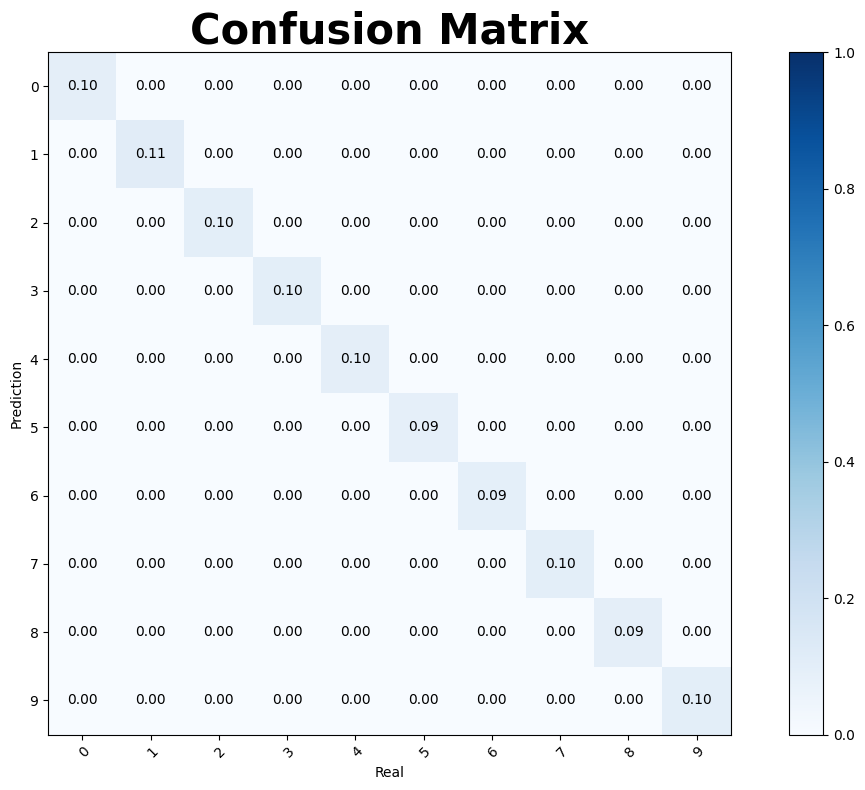

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(normalizedConfusionMatrix, vmin = 0, vmax = 1, cmap='Blues')
ax.set_xticks(labels, labels=labels)
ax.set_yticks(labels, labels=labels)
ax.set_xlabel('Real')
ax.set_ylabel('Prediction')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
fig.colorbar(ScalarMappable(cmap='Blues'))
for i in range(normalizedConfusionMatrix.shape[0]):
    for j in range(normalizedConfusionMatrix.shape[1]):
        text = ax.text(j, i, f"{normalizedConfusionMatrix[i,j]:.2f}", 
                       ha='center', va='center', color='black')
ax.set_title('Confusion Matrix', fontsize= 30, fontweight='bold')
fig.tight_layout()